In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report

,rend_medio,volatilidad_rend
0,14.6,15.3
1,10.0,9.2
2,10.5,13.5
3,12.0,16.3
4,11.9,15.6
5,12.4,12.1
6,14.8,16.8
7,15.7,19.3
8,10.9,13.7
9,14.4,21.4


Text(0, 0.5, 'Volatilidad media')

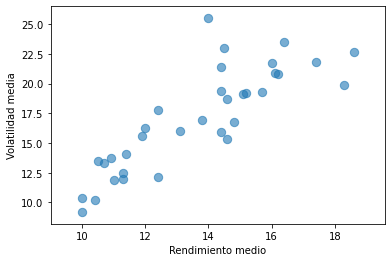

In [52]:
df = pd.read_excel("data/volatilidad_regSVM.xlsx")
x_min, x_max = df["rend_medio"].min(), df["rend_medio"].max()
y_min, y_max = df["volatilidad_rend"].min(), df["volatilidad_rend"].max()
display(df)

fig, ax = plt.subplots()
plt.scatter(df.rend_medio,df.volatilidad_rend,
            s = 70,
            alpha = 0.6)
plt.ylim(y_min-1, y_max+1)
plt.xlim(x_min-1, x_max+1)
plt.xlabel("Rendimiento medio")
plt.ylabel("Volatilidad media")

10.0

Ahora haremos una busqueda de los mejores parametros para el modelo de regresión de SVM.

In [ ]:
X, y = df.values[:,0].reshape(-1,1), df.values[:,1].reshape(-1,1)
print(f'Data shape, X: {X.shape}, y: {y.shape}')

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 42)


param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'kernel': ['linear','rbf', 'poly', 'sigmoid']}
              
grid = GridSearchCV(SVR(), #model
                    param_grid) #Grid                    

grid.fit(X_train, y_train)


De las anteriores posibilidades, vemos que el mejor resulta ser utilizando 

gamma = 0.01

C = 100

Alcanzando un score ($R^2 = 0.3664$)

In [53]:
print(grid.best_estimator_)
print(grid.best_score_)
grid.best_estimator_

SVR(C=100, gamma=0.01)
0.3664126074614052


SVR(C=100, gamma=0.01)

Veamos ahora este ajuste con los datos de entrenamiento

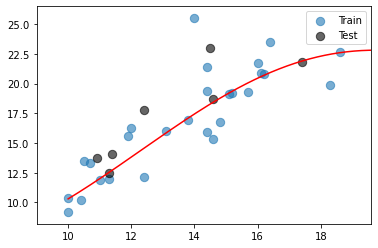

In [57]:
# X, y = X_train, y_train
X_grid = np.arange(min(X_train), max(y_train), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train,
            s = 70,
            alpha = 0.6,
            label = "Train")

plt.scatter(X_test, y_test,
            c = "k",
            s = 70,
            alpha = 0.6,
            label = "Test")

plt.ylim(y_min-1, y_max+1)
plt.xlim(x_min-1, x_max+1)
plt.plot(X_grid, grid.predict(X_grid), color = 'r')
plt.legend()

Alcanzando un $R^2 = 0.62$ para el conjunto de test, siendo un buen ajuste.

In [58]:
grid.score(X_test, y_test)

0.6215161567599072